In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraud"]

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('/content/drive/MyDrive/project/Credit-Card_Fraudlent/creditcard.csv',sep=',')

In [73]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Exploratory Data Analysis**

In [75]:
data.isnull().values.any()

False

In [76]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

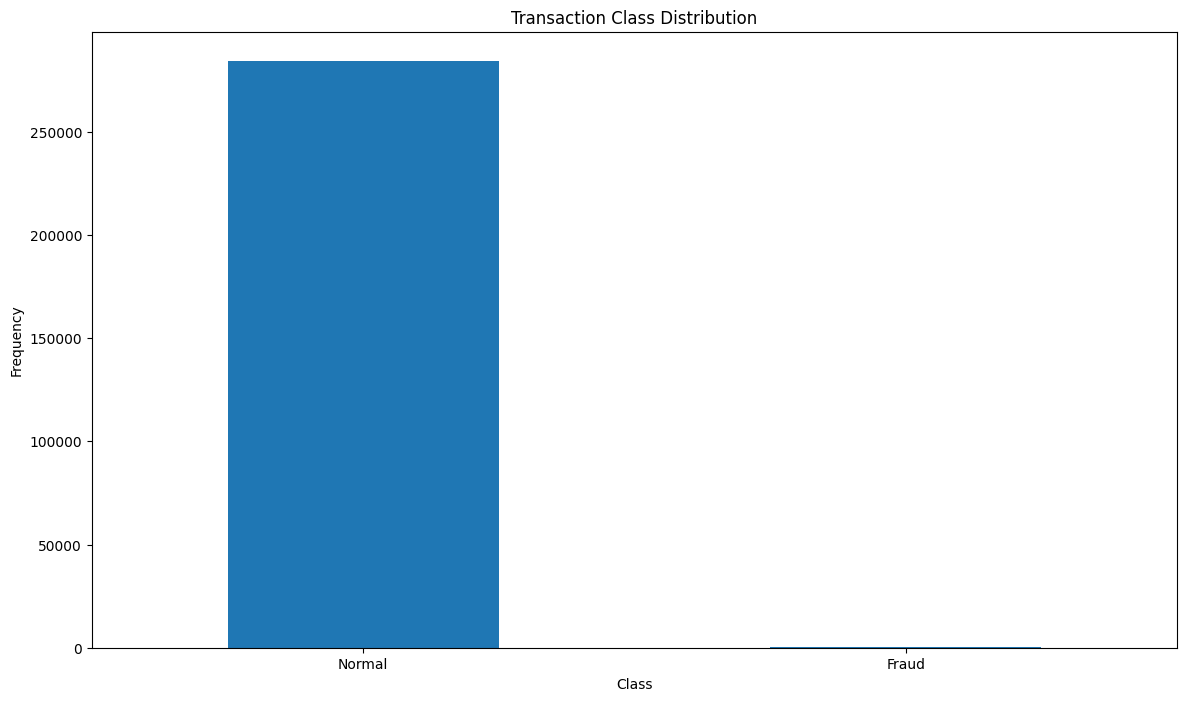

In [77]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [78]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [79]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [80]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [81]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008274,-0.006263,0.027167,-0.007837,0.005475,0.002403,0.009666,-0.000985,0.008785,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions


Number of Fraudulent Transactions --> 492

In [82]:
normal_sample = normal.sample(n=492)

Concatenating two DataFrames

In [83]:
new_dataset = pd.concat([normal_sample, fraud], axis=0)

In [84]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
195951,131293.0,-0.609444,-0.027927,1.650648,-2.063691,-0.128567,-0.182092,0.134597,-0.037545,-1.085531,...,0.313832,0.823551,-0.498213,-0.595354,0.791781,0.071873,0.024884,0.051062,39.99,0
257793,158347.0,2.022954,-0.203115,-1.272337,0.280929,0.035560,-0.701980,0.076951,-0.141747,0.441763,...,-0.220658,-0.547157,0.231473,-0.338402,-0.206695,0.277722,-0.083429,-0.076442,12.23,0
105122,69374.0,-1.316913,0.423613,2.678330,3.477026,-1.018595,0.946341,-0.492553,0.778762,-0.483029,...,0.235259,0.663104,-0.105895,0.448329,0.351793,0.504512,-0.000353,-0.024926,107.61,0
156407,108061.0,-0.742800,0.978975,2.455160,-0.088947,-0.345335,-0.355902,0.243963,0.035257,1.193730,...,-0.160050,-0.274776,-0.212914,0.433997,0.156777,-0.765664,-0.056017,0.068339,2.12,0
117715,74780.0,1.192654,-0.729105,-0.474025,-0.981546,1.257973,3.810957,-1.216850,1.031417,0.954478,...,-0.146339,-0.473156,-0.011614,1.081759,0.256555,1.001102,-0.039536,0.016811,50.00,0


In [85]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [86]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92741.298780,0.153975,0.021172,0.056155,-0.028143,-0.029608,-0.007046,0.010419,-0.020593,0.026161,...,0.026921,-0.002509,-0.030090,0.015786,-0.028408,0.014607,0.004313,-0.009309,0.007316,81.988374
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [87]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [88]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
195951  131293.0 -0.609444 -0.027927  1.650648 -2.063691 -0.128567 -0.182092   
257793  158347.0  2.022954 -0.203115 -1.272337  0.280929  0.035560 -0.701980   
105122   69374.0 -1.316913  0.423613  2.678330  3.477026 -1.018595  0.946341   
156407  108061.0 -0.742800  0.978975  2.455160 -0.088947 -0.345335 -0.355902   
117715   74780.0  1.192654 -0.729105 -0.474025 -0.981546  1.257973  3.810957   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [89]:
print(Y)

195951    0
257793    0
105122    0
156407    0
117715    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**HoldOut Validation Approach- Train And Test Split**

Split the data into Training data & Testing Data

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=2)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# **Model Training**

Logistic Regression


In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [93]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

LogisticRegression()

# Model Evaluation

Accuracy Score

In [94]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [95]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9212198221092758


In [96]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [97]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264
